# Week 7. In-Class Practice

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

### 將 Titanic 資料讀入

In [2]:
data = pd.read_csv("dataset/titanicTrain.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
pclass       1000 non-null int64
survived     1000 non-null int64
name         1000 non-null object
sex          1000 non-null object
age          861 non-null float64
sibsp        1000 non-null int64
parch        1000 non-null int64
ticket       1000 non-null object
fare         1000 non-null float64
cabin        283 non-null object
embarked     998 non-null object
boat         417 non-null object
body         95 non-null float64
home.dest    742 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 109.5+ KB


其中`age`、`cabin`、`emabrked`、`cabin`、`boat`、`body`、`home.dest` 有缺失值，在建模之前需要處理這個問題。

In [3]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


說明各欄位的意義：
- pclass: 艙等
- survived: 生存與否，存活為1
- name: 乘客姓名
- sex: 乘客性別
- age: 乘客年齡
- sibsp: 兄弟姊妹+配偶人數 (Sibling aand Spouse)
- parch: 父母+子女人數 (Parent and Children)
- ticket: 船票編號
- fare: 票價
- cabin: 船艙號碼
- embarked: 出發地
- boat: 所乘救生艇的編號
- body: 遺體編號 Body Identification Number
- home.dest: 家鄉/目的地 (Home/Destination)

想知道更詳細的資訊可以參考此網站：http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt

## 探索性資料分析 (Explorative Data Analysis, EDA)

In [4]:
# A function for getting colors from built-in colormap
def get_colors(colormap, n):
    color_cood = np.linspace(0, 1, n)
    colors = [plt.get_cmap(colormap)(i) for i in color_cood]
    return colors

#### 應變數 Survived 

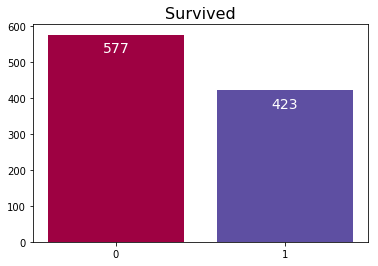

In [5]:
survived_count = data.groupby('survived')['name'].count()
plt.bar(x =[str(i) for i in survived_count.index],
        height = survived_count.values, 
        color = get_colors('Spectral', 2))
for i, val in zip(survived_count.index, survived_count.values):
    plt.annotate(str(val),
                 xy = (i, val-50),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = 'white')
plt.title("Survived", fontsize=16)
plt.show()

#### 自變數 pclass
- 各艙等人數：經濟(3) > 頭等(1) > 商務(2)
- 較貴的艙等，生存機率較高：頭等艙有優先獲救的可能？

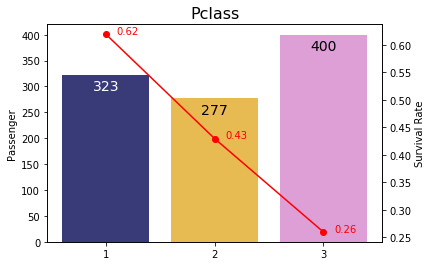

In [6]:
pclass_count = data.groupby('pclass').size()
pclass_survived = data.groupby(['pclass', 'survived']).size()[1::2]
pclass_survived_rate = [i/j  for i, j in zip(pclass_survived, pclass_count)]

fig, ax = plt.subplots()
ax.bar(x =[str(i) for i in pclass_count.index],
        height = pclass_count.values,
        color = get_colors('tab20b', 3))
ax.set_ylabel('Passenger')

tcolor = ['white', 'black', 'black']
for i, val, c in zip(pclass_count.index, pclass_count.values, tcolor):
    plt.annotate(str(val),
                 xy = (i-1, val-30),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = c)

ax2 = ax.twinx()
ax2.set_ylabel('Survival Rate')
ax2.plot(pclass_survived_rate, marker='o', color='red')
for i, val in zip(pclass_count.index, pclass_survived_rate):
    ax2.annotate("%.2f"%(val),
                 xy = (i-1+0.2, val),
                 horizontalalignment = 'center',
                 color = 'red')

plt.title("Pclass", fontsize=16)
plt.show()

#### 自變數 name
- 為文字資料
- 沒有缺失值

#### 自變數 sex
- 船上乘客：男 > 女
- 女性生存比例較大

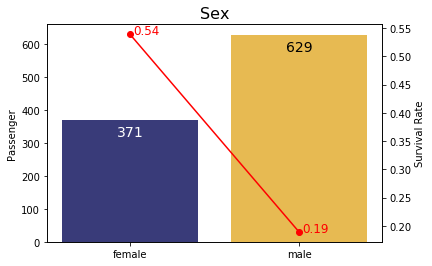

In [7]:
sex_count = data.groupby('sex').size()
sex_survived = data.groupby(['pclass', 'survived']).size()[1::2]
sex_survived_rate = [i/j  for i, j in zip(sex_survived, sex_count)]

fig, ax = plt.subplots()
ax.bar(x = sex_count.index,
       height = sex_count.values,
       color = get_colors('tab20b', 3)[0:2])
ax.set_ylabel('Passenger')

tcolor = ['white', 'black']
for i, c in zip(range(len(sex_count.index)), tcolor):
    plt.annotate(sex_count.values[i],
                 xy = (i, sex_count.values[i]-50),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = c)

ax2 = ax.twinx()
ax2.set_ylabel('Survival Rate')
ax2.plot(sex_survived_rate, marker='o', color='red')
for i, val in zip(range(len(sex_count.index)), sex_survived_rate):
    ax2.annotate("%.2f"%(val),
                 xy = (i+0.1, val),
                 horizontalalignment = 'center',
                 fontsize = 12,
                 color ='red')

plt.title("Sex", fontsize=16)
plt.show()

#### 自變數 age
- 約有 1/2 的乘客年紀位於 20 ~ 40 歲之間
- 缺失值比例約占全部的 1/9
- 缺失資料的生存比例較低，但差異不大
- 小孩和老年人的生存比例較高

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


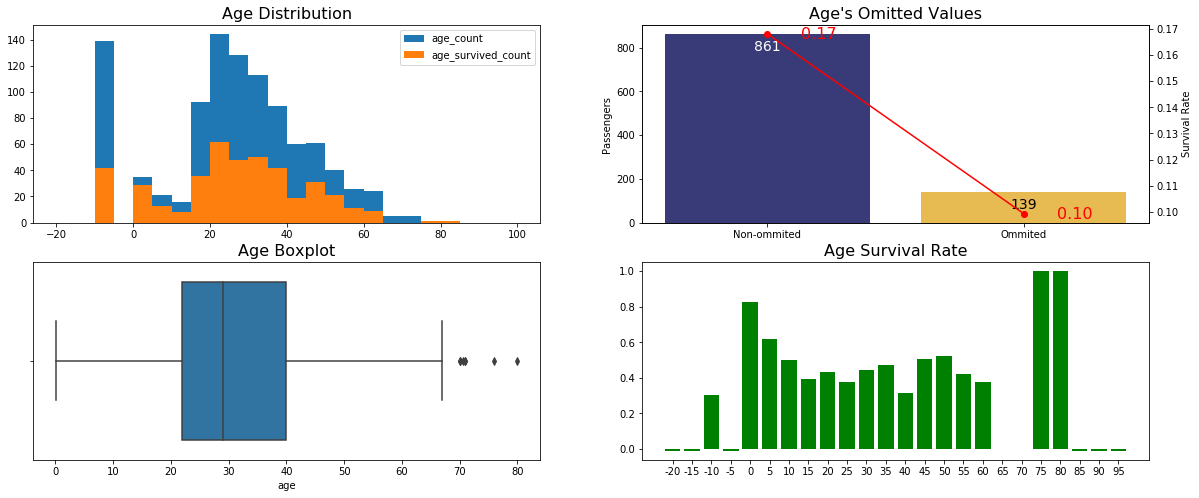

In [8]:
age = data['age']
age = age.fillna(-10) # since there are NaNs in age column
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

# Upper-left
(n1, bins, patches) = ax[0,0].hist(data['age'].fillna(-10), bins=np.linspace(-20,100,25))
(n2, bins, patches) = ax[0,0].hist(data[data.survived==1]['age'].fillna(-10), bins=np.linspace(-20,100,25))
ax[0, 0].legend(labels=('age_count', 'age_survived_count'))
ax[0, 0].set_title("Age Distribution", fontsize=16) 

# Upper-right
## bar chart
age_Na_notNA = [len(age[age>0]), 1000-len(age[age>0])]
ax[0, 1].bar(x=['Non-ommited', 'Ommited'], height=age_Na_notNA, color=get_colors('tab20b', 3)[0:2])
tcolor = ['white', 'black']
for i in range(len(age_Na_notNA)):
    ax[0, 1].annotate(age_Na_notNA[i],
                      xy=(i, age_Na_notNA[i]-75),
                      horizontalalignment='center',
                      fontsize=14, color=tcolor[i])
ax[0, 1].set_ylabel('Passengers')
ax[0, 1].set_title("Age's Omitted Values", fontsize=16)

## line plot
age_survived = data[['age', 'survived']]
age_survived['age_na'] = age_survived['age'].apply(lambda x: np.isnan(x))
age_survived.groupby(['survived', 'age_na']).size()
age_na_survived_rate = [i/j  for i, j in zip(age_survived.groupby(['survived', 'age_na']).size()[[1, 3]],
                                            age_survived.groupby('survived').size())]
ax2 = ax[0, 1].twinx()
ax2.set_ylabel('Survival Rate')
ax2.plot(age_na_survived_rate, marker='o', color='red')
for i, val in zip(range(2), age_na_survived_rate):
    ax2.annotate("%.2f"%(val),
                 xy = (i+0.2, val-0.002),
                 horizontalalignment = 'center',
                 fontsize = 16,
                 color = 'red')

# Lower-left
sns.boxplot(age[age>0], ax=ax[1, 0])
ax[1, 0].set_title("Age Boxplot", fontsize=16) 

# Lower-Right
age_survival_rate = [i/j if not np.isnan(i/j) else -0.01 for i, j in zip(n2, n1)] # -1 for no data exists
ax[1, 1].bar(x =  ["%d"%(i) for i in np.linspace(-20,100,25)][0:-1],
             height = age_survival_rate,
             color = 'green')
ax[1, 1].set_title("Age Survival Rate", fontsize=16)

plt.show()

#### 自變數 sibsp
- sibsp 由少而多人數逐漸減少
- 單身與 sibsp>=4 存活比例較低

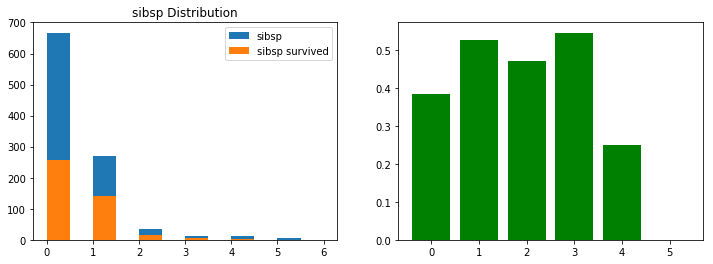

In [9]:
fig, ax=plt.subplots(1, 2, figsize=(12,4))

# Left
(n1, bins, patches) = ax[0].hist(data['sibsp'],
                                 bins=range(max(data['sibsp'])+2),
                                 width=0.5)
(n2, bins, patches) = ax[0].hist(data[data.survived==1]['sibsp'],
                                 bins=range(max(data['sibsp'])+2),
                                 width=0.5)
ax[0].legend(labels=['sibsp', 'sibsp survived'])
ax[0].set_title('sibsp Distribution')

# Right
sibsp_survival_rate = [i/j if not np.isnan(i/j) else -0.01 for i,j in zip(n2, n1)]
ax[1].bar(x = range(max(data['sibsp'])+1),
          height = sibsp_survival_rate,
          color = 'green')

plt.show()

#### 自變數 parch
- parch 由少而多人數遞減
- parch=0 和 parch>=4 存活比例低

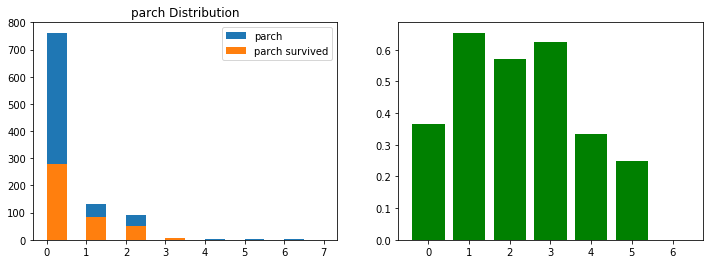

In [10]:
fig, ax=plt.subplots(1, 2, figsize=(12,4))

# Left
(n1, bins, patches) = ax[0].hist(data['parch'],
                                 bins=range(max(data['parch'])+2),
                                 width=0.5)
(n2, bins, patches) = ax[0].hist(data[data.survived==1]['parch'],
                                 bins=range(max(data['parch'])+2),
                                 width=0.5)
ax[0].legend(labels=['parch', 'parch survived'])
ax[0].set_title('parch Distribution')

# Right
parch_survival_rate = [i/j if not np.isnan(i/j) else -0.01 for i,j in zip(n2, n1)]
ax[1].bar(x = range(max(data['parch'])+1),
          height = parch_survival_rate,
          color = 'green')

plt.show()

#### 自變數 ticket
- 文字資料
- 無缺失值

#### 自變數 fare
- 低價的船票較多，但生存比例明顯較低
- 看起來和艙等的結論差不多

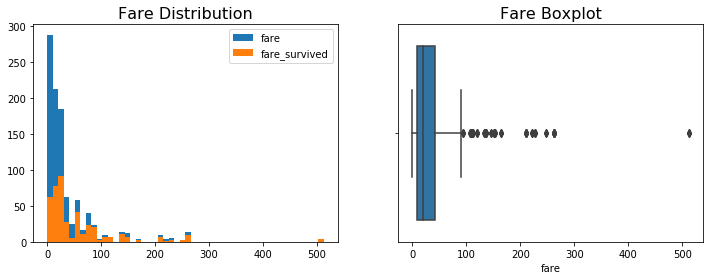

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(x=data['fare'], bins=50)
ax[0].hist(x=data[data.survived==1]['fare'], bins=50)
ax[0].legend(labels=['fare', 'fare_survived'])
ax[0].set_title('Fare Distribution', fontsize=16)

ax[1] = sns.boxplot(data['fare'], labels=['Fare'])
ax[1].set_title('Fare Boxplot', fontsize=16)

plt.show()

#### 自變數 cabin
- 缺失資料生存比例較低：
    - 死亡人口較難回溯資料？
    - 抑或有逃票的可能性？

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


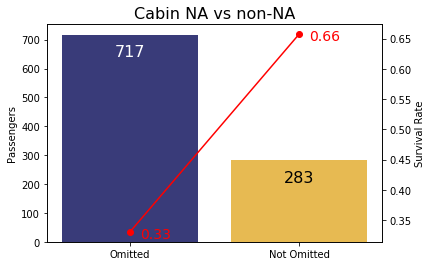

In [12]:
cabin_NA_notNA = [len(data[data.cabin.isna()]), len(data[data.cabin.notna()])]
cabin_survived = data[['cabin', 'survived']]
cabin_survived['na'] = pd.isnull(cabin_survived['cabin'])
cabin_survived_rate = [i/j for i, j in zip(cabin_survived.groupby(['na', 'survived']).size()[[3,1]],
                                           cabin_NA_notNA)]
fig, ax = plt.subplots(figsize=(6, 4))

# bar chart
ax.bar(x = ['Omitted', 'Not Omitted'],
       height = cabin_NA_notNA,
       color = get_colors('tab20b', 3)[0:2])
ax.set_ylabel('Passengers')
tcolor = ['white', 'black']
for i in range(len(cabin_NA_notNA)):
    ax.annotate(str(cabin_NA_notNA[i]),
                xy=(i, cabin_NA_notNA[i]-75),
                horizontalalignment = 'center',
                fontsize = 16,
                color = tcolor[i])
ax.set_title('Cabin NA vs non-NA', fontsize=16)

# line    
ax2 = ax.twinx()
ax2.plot(cabin_survived_rate, color='red', marker='o')
ax2.set_ylabel('Survival Rate')
for i in range(len(cabin_survived_rate)):
    ax2.annotate("%.2f"%(cabin_survived_rate[i]),
                 xy = (i+0.15, cabin_survived_rate[i]-0.01),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = 'red')
plt.show()

#### 自變數 embark
- 從 S 地出發人數最多，其次是 C 地，最後為 Q 地
- 存活比率：C > S > Q
- 有少數二個遺漏值，或許可以試著補上去？

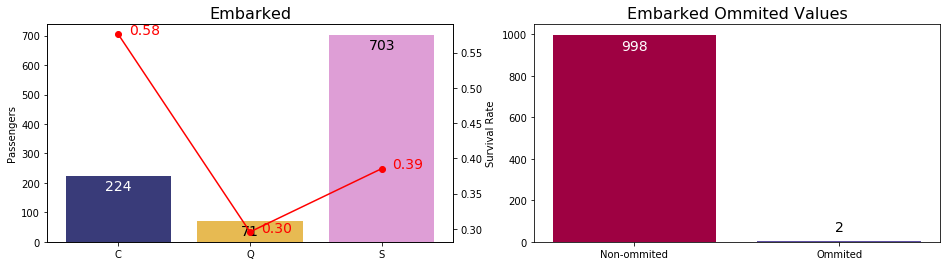

In [13]:
embarked_count = data.groupby('embarked')['survived'].count()
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].bar(x =[str(i) for i in embarked_count.index],
        height = embarked_count.values,
        color = get_colors('tab20b', 3))
tcolor = ['white', 'black', 'black']
for i, val, c in zip(embarked_count.index, embarked_count.values, tcolor):
    ax[0].annotate(str(val),
                 xy = (i, val-50),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = c)
ax[0].set_ylabel("Passengers")
ax[0].set_title("Embarked", fontsize=16)

ax2 = ax[0].twinx()
embarked_survived_count = data.groupby(['embarked', 'survived']).size()[[1, 3, 5]]
embarked_survived_rate = [i/j for i, j in zip(embarked_survived_count, embarked_count)]
ax2.plot(embarked_survived_rate, color='red', marker='o')
ax2.set_ylabel("Survival Rate")
for i in range(3):
    ax2.annotate("%.2f"%(embarked_survived_rate[i]),
                xy = (i+0.2, embarked_survived_rate[i]),
                color = 'red',
                horizontalalignment = 'center',
                fontsize = 14)


embarked_Na_notNA = [len(data[data['embarked'].notna()]), len(data[data['embarked'].isna()])]
ax[1].bar(x=['Non-ommited', 'Ommited'],
          height=embarked_Na_notNA,
          color=get_colors('Spectral', 2))
ax[1].annotate(str(embarked_Na_notNA[0]), xy=(0, embarked_Na_notNA[0]-75), horizontalalignment='center', fontsize=14, color='white')
ax[1].annotate(str(embarked_Na_notNA[1]), xy=(1, embarked_Na_notNA[1]+50), horizontalalignment='center', fontsize=14)
ax[1].set_title("Embarked Ommited Values", fontsize=16)
plt.show()

#### 自變數 boat
- 有救生艇紀錄的人和沒有救生艇記錄的人大概一半一半
- 有救生艇記錄的人存活比率顯著提高：搭救生艇基本上就能活下來，沒搭的基本上都死了
- **關鍵 Feature**

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


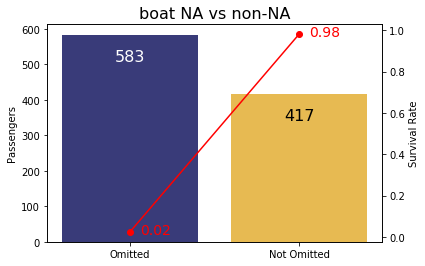

In [14]:
boat_NA_notNA = [len(data[data.boat.isna()]), len(data[data.boat.notna()])]
boat_survived = data[['boat', 'survived']]
boat_survived['na'] = pd.isnull(boat_survived['boat'])
boat_survived_rate = [i/j for i, j in zip(boat_survived.groupby(['na', 'survived']).size()[[3,1]],
                                           boat_NA_notNA)]
fig, ax = plt.subplots(figsize=(6, 4))

# bar chart
ax.bar(x = ['Omitted', 'Not Omitted'],
       height = boat_NA_notNA,
       color = get_colors('tab20b', 3)[0:2])
ax.set_ylabel('Passengers')
tcolor = ['white', 'black']
for i in range(len(boat_NA_notNA)):
    ax.annotate(str(boat_NA_notNA[i]),
                xy=(i, boat_NA_notNA[i]-75),
                horizontalalignment = 'center',
                fontsize = 16,
                color = tcolor[i])
ax.set_title('boat NA vs non-NA', fontsize=16)

# line    
ax2 = ax.twinx()
ax2.plot(boat_survived_rate, color='red', marker='o')
ax2.set_ylabel('Survival Rate')
for i in range(len(boat_survived_rate)):
    ax2.annotate("%.2f"%(boat_survived_rate[i]),
                 xy = (i+0.15, boat_survived_rate[i]-0.01),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = 'red')
plt.show()

#### 自變數 body
- 找到遺體的乘客都已經死了
- 沒有遺體紀錄的乘客，存活機率大概1/2：機率基本上跟用猜的一樣

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


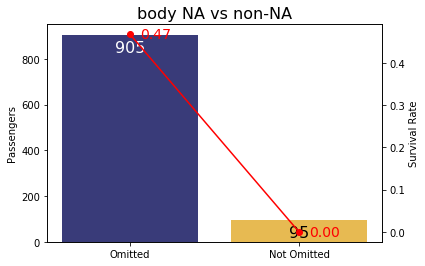

In [15]:
body_NA_notNA = [len(data[data.body.isna()]), len(data[data.body.notna()])]
body_survived = data[['body', 'survived']]
body_survived['na'] = pd.isnull(body_survived['body'])
body_survived_rate = [i/j for i, j in zip([body_survived.groupby(['na', 'survived']).size()[2], 0], # manually set the value 0
                                           body_NA_notNA)]
fig, ax = plt.subplots(figsize=(6, 4))

# bar chart
ax.bar(x = ['Omitted', 'Not Omitted'],
       height = body_NA_notNA,
       color = get_colors('tab20b', 3)[0:2])
ax.set_ylabel('Passengers')
tcolor = ['white', 'black']
for i in range(len(body_NA_notNA)):
    ax.annotate(str(body_NA_notNA[i]),
                xy=(i, body_NA_notNA[i]-75),
                horizontalalignment = 'center',
                fontsize = 16,
                color = tcolor[i])
ax.set_title('body NA vs non-NA', fontsize=16)

# line    
ax2 = ax.twinx()
ax2.plot(body_survived_rate, color='red', marker='o')
ax2.set_ylabel('Survival Rate')
for i in range(len(body_survived_rate)):
    ax2.annotate("%.2f"%(body_survived_rate[i]),
                 xy = (i+0.15, body_survived_rate[i]-0.01),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = 'red')
plt.show()

#### 自變數 homedest
- 有 home.dest 紀錄的乘客，存活機率1/2
- 沒有紀錄的乘客，存活機率顯著降低

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


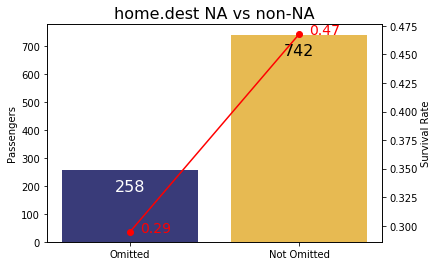

In [16]:
homedest_NA_notNA = [len(data[data['home.dest'].isna()]), len(data[data['home.dest'].notna()])]
homedest_survived = data[['home.dest', 'survived']]
homedest_survived['na'] = pd.isnull(homedest_survived['home.dest'])
homedest_survived_rate = [i/j for i, j in zip(homedest_survived.groupby(['na', 'survived']).size()[[3,1]],
                                           homedest_NA_notNA)]
fig, ax = plt.subplots(figsize=(6, 4))

# bar chart
ax.bar(x = ['Omitted', 'Not Omitted'],
       height = homedest_NA_notNA,
       color = get_colors('tab20b', 3)[0:2])
ax.set_ylabel('Passengers')
tcolor = ['white', 'black']
for i in range(len(homedest_NA_notNA)):
    ax.annotate(str(homedest_NA_notNA[i]),
                xy=(i, homedest_NA_notNA[i]-75),
                horizontalalignment = 'center',
                fontsize = 16,
                color = tcolor[i])
ax.set_title('home.dest NA vs non-NA', fontsize=16)

# line    
ax2 = ax.twinx()
ax2.plot(homedest_survived_rate, color='red', marker='o')
ax2.set_ylabel('Survival Rate')
for i in range(len(homedest_survived_rate)):
    ax2.annotate("%.2f"%(homedest_survived_rate[i]),
                 xy = (i+0.15, homedest_survived_rate[i]),
                 horizontalalignment = 'center',
                 fontsize = 14,
                 color = 'red')
plt.show()

### 數據處理

#### 1. 填補 embarked 的缺失值

In [17]:
data[data.embarked.isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [18]:
data.groupby(['sex', 'pclass', 'embarked']).size()

sex     pclass  embarked
female  1       C            71
                Q             2
                S            69
        2       C            11
                Q             2
                S            93
        3       C            16
                Q            30
                S            75
male    1       C            70
                Q             1
                S           108
        2       C            17
                Q             5
                S           149
        3       C            39
                Q            31
                S           209
dtype: int64

In [19]:
data.loc[[168, 284], 'embarked'] = 'C'
data.iloc[[168, 284]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,C,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,C,6,NaN,"Cincinatti, OH"


#### 2. 其他變數處理

In [20]:
original_col = data.columns

# Add pclass Dummies
data['First_class'] = data['pclass'].map({1:1, 2:0, 3:0}).astype('int')
data['Second_class'] = data['pclass'].map({1:0, 2:1, 3:0}).astype('int')

# Add Sex Dummies
data['Male'] = data['sex'].map({'male':1, 'female':0}).astype('int')

# Add Age Categories
data['age'].fillna(-5) # deal with omitting values
for i in np.linspace(0, 85, 18)[::-1]:
    data['Age_%d_%d'%(i-5, i)] = data['age'].apply(lambda x: int(i-5 <= x < i))

# Add FamilyNum Feature and Normalize it
from sklearn.preprocessing import MinMaxScaler
data['FamilyNum'] = data['sibsp'] + data['parch']
scaler = MinMaxScaler()
familynum = data['FamilyNum'].values[np.newaxis].T
scaler.fit(familynum)
data['FamilyNum'] = scaler.transform(familynum)

# Add Normalized Fare
fare = data['fare'].values[np.newaxis].T
scaler.fit(fare)
data['Fare'] = scaler.transform(fare)

# Add Cabin Omitting Dummies
data['NA_cabin'] = pd.isnull(data['cabin']).astype('int')

# Add Embarked Dummies
data = pd.concat([data, pd.get_dummies(data['embarked'], prefix='Embarked')], axis=1)

# Add boat Omitting Dummies
data['NA_boat'] = pd.isnull(data['boat']).astype('int')

# Add body Omitting Dummies
data['NA_body'] = pd.isnull(data['body']).astype('int')

# Add home.dest Omitting Dummies
data['NA_homedest'] = pd.isnull(data['home.dest']).astype('int')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### 開始使用 SVM
終於走到了這一步

In [21]:
X = data.drop(original_col, axis=1)
Y = data['survived']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [22]:
print(X_train.shape)
print(X_test.shape)

(670, 30)
(330, 30)


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.98 (+/- 0.01)


In [24]:
from sklearn.metrics import accuracy_score
clf.fit(X_test, Y_test)
print("Test Accuracy: ", accuracy_score(clf.predict(X_test), Y_test))

Test Accuracy:  0.9787878787878788


哇，這樣好像很厲害！！

但是如果我們把關鍵的特徵：救生艇拿出來直接算準確率時...

In [25]:
print("Test Accuracy: ", accuracy_score(1-X_test['NA_boat'], Y_test))

Test Accuracy:  0.9787878787878788


其他的特徵根本都在划水啊！！

也許更深入、細緻的特徵工程可以再拉高目前的準確率，但是就目前的進度而言，上救生艇與否這個特徵解釋了絕大部分的人生存與否。